In [11]:
import pandas as pd
import seaborn as sns
# Ganti dengan path yang sesuai
file_path = 'katalog_gempa.csv'  # Ubah path ini sesuai lokasi file di komputer kamu

# Membaca file CSV
gempa_data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama untuk memeriksa struktur data
print(gempa_data.head())

          tgl            ot   lat     lon  depth  mag  \
0  2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1  2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2  2008/11/01  17:43:12.941 -7.01  106.63    121  3.7   
3  2008/11/01  16:24:14.755 -3.30  127.85     10  3.2   
4  2008/11/01  16:20:37.327 -6.41  129.54     70  4.3   

                     remark  strike1  dip1  rake1  strike2  dip2  rake2  
0  Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
1                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
2          Java - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
3         Seram - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
4                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  


In [12]:
# Melihat info kolom dan tipe data
print(gempa_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB
None


In [13]:
print(gempa_data.isnull().sum())

tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64


In [14]:
gempa_data.dropna(axis=1, thresh=int(0.9 * len(gempa_data)), inplace=True)

In [15]:
gempa_data['tgl'] = pd.to_datetime(gempa_data['tgl'], format='%Y/%m/%d')
gempa_data['ot'] = pd.to_datetime(gempa_data['ot'], format='%H:%M:%S.%f')

In [16]:
print(gempa_data.duplicated().sum())

2735


In [17]:
gempa_data.drop_duplicates(inplace=True)

In [18]:
print(gempa_data.duplicated().sum())  # Harus menunjukkan 0 duplikasi

0


In [19]:
print(gempa_data.describe())

                                 tgl                             ot  \
count                          90152                          90152   
mean   2017-11-26 00:30:49.676102912  1900-01-01 12:32:58.925250304   
min              2008-11-01 00:00:00     1900-01-01 00:00:01.979000   
25%              2015-10-15 00:00:00  1900-01-01 06:42:46.007500032   
50%              2018-10-04 00:00:00  1900-01-01 13:11:25.260499968   
75%              2020-12-02 00:00:00  1900-01-01 18:14:33.720750080   
max              2023-01-26 00:00:00     1900-01-01 23:59:58.972000   
std                              NaN                            NaN   

                lat           lon         depth           mag  
count  90152.000000  90152.000000  90152.000000  90152.000000  
mean      -3.412285    119.175422     48.386126      3.550424  
min      -11.000000     94.020000      2.000000      1.000000  
25%       -7.910000    113.490000     10.000000      3.000000  
50%       -2.910000    121.150000     15

In [20]:
# Pilih hanya kolom numerik untuk menghitung korelasi
numerik_data = gempa_data.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi antar kolom numerik
print(numerik_data.corr())

            lat       lon     depth       mag
lat    1.000000  0.060735  0.003243  0.120681
lon    0.060735  1.000000  0.099329  0.116486
depth  0.003243  0.099329  1.000000  0.235642
mag    0.120681  0.116486  0.235642  1.000000


In [21]:
print(gempa_data['remark'].value_counts())

remark
Minahassa Peninsula - Sulawesi        9294
Sulawesi - Indonesia                  7762
Sumbawa Region - Indonesia            7202
Java - Indonesia                      6591
Northern Sumatra - Indonesia          5763
Southern Sumatra - Indonesia          5084
Northern Molucca Sea                  4828
Banda Sea                             4723
Seram - Indonesia                     4264
Halmahera - Indonesia                 3507
Irian Jaya Region - Indonesia         3043
South of Java - Indonesia             2414
Talaud Islands - Indonesia            2319
Flores Region - Indonesia             2298
Timor Region                          1911
Flores Sea                            1844
Near North Coast of Irian Jaya        1812
Sumba Region - Indonesia              1806
Irian Jaya - Indonesia                1588
Ceram Sea                             1514
Bali Region - Indonesia               1354
Southern Molucca Sea                  1224
Off West Coast of Northern Sumatra    1002
Sund

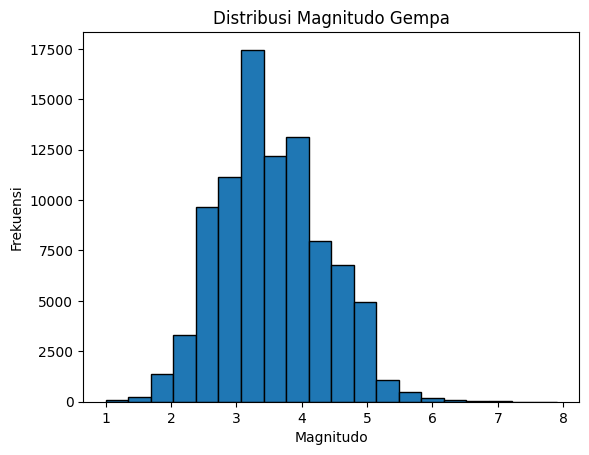

In [22]:
import matplotlib.pyplot as plt

plt.hist(gempa_data['mag'], bins=20, edgecolor='black')
plt.title('Distribusi Magnitudo Gempa')
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')
plt.show()

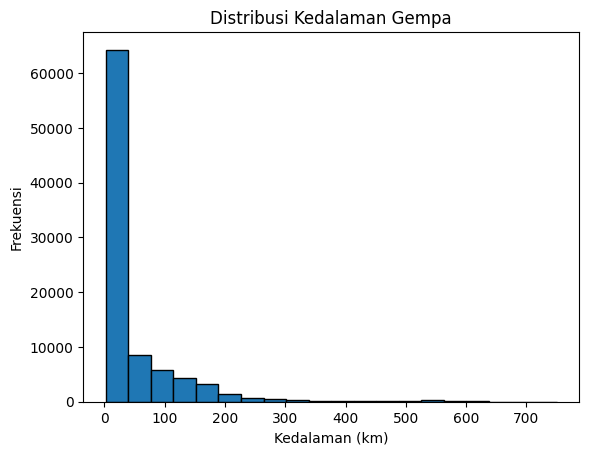

In [23]:
plt.hist(gempa_data['depth'], bins=20, edgecolor='black')
plt.title('Distribusi Kedalaman Gempa')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Frekuensi')
plt.show()


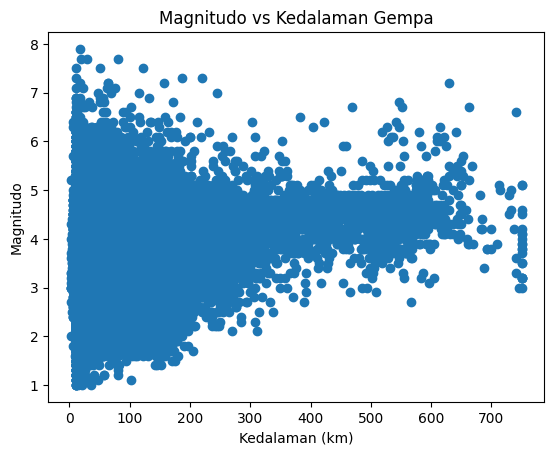

In [24]:
plt.scatter(gempa_data['depth'], gempa_data['mag'])
plt.title('Magnitudo vs Kedalaman Gempa')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Magnitudo')
plt.show()


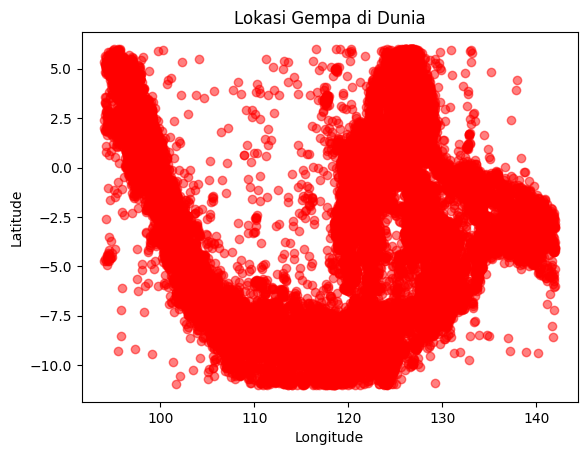

In [25]:
plt.scatter(gempa_data['lon'], gempa_data['lat'], alpha=0.5, color='red')
plt.title('Lokasi Gempa di Dunia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


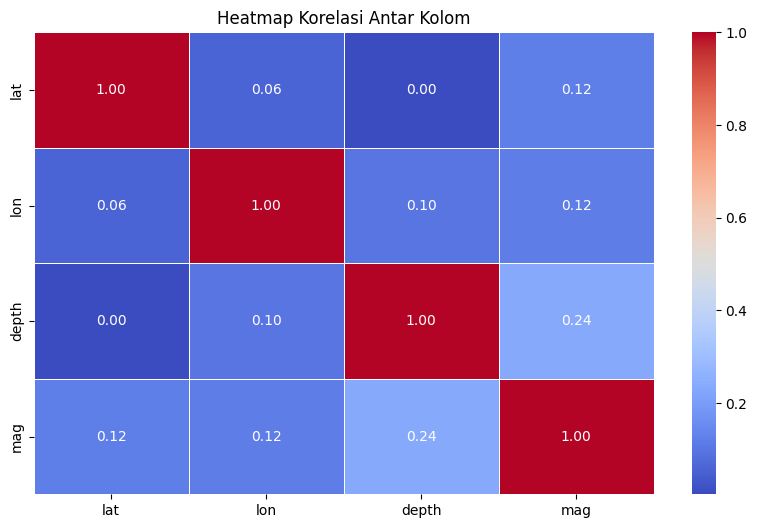

In [26]:
# Pilih hanya kolom numerik untuk menghitung korelasi
numerik_data = gempa_data.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi antar kolom numerik
correlation_matrix = numerik_data.corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

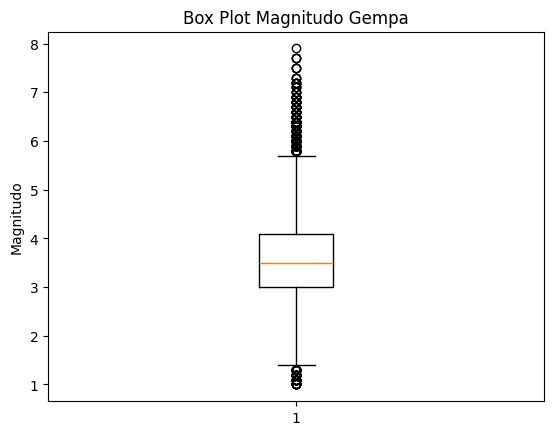

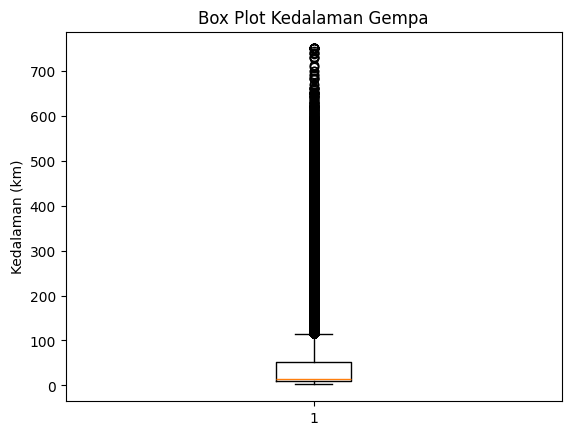

In [27]:
plt.boxplot(gempa_data['mag'])
plt.title('Box Plot Magnitudo Gempa')
plt.ylabel('Magnitudo')
plt.show()

plt.boxplot(gempa_data['depth'])
plt.title('Box Plot Kedalaman Gempa')
plt.ylabel('Kedalaman (km)')
plt.show()

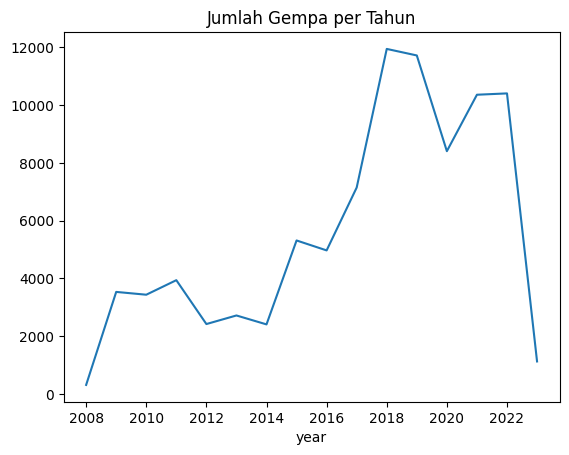

In [28]:
gempa_data['year'] = gempa_data['tgl'].dt.year
gempa_per_tahun = gempa_data.groupby('year').size()
gempa_per_tahun.plot(kind='line', title='Jumlah Gempa per Tahun')
plt.show()

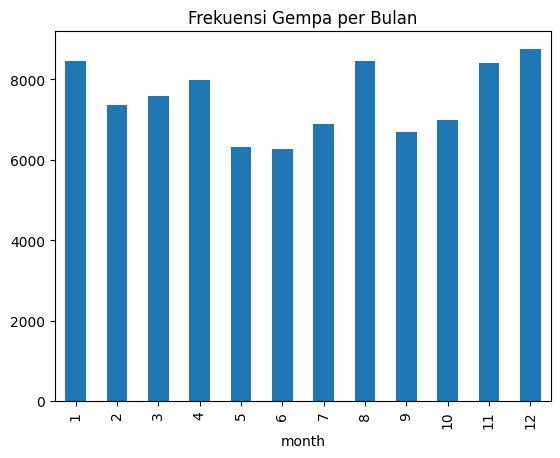

In [29]:
gempa_data['month'] = gempa_data['tgl'].dt.month
gempa_per_bulan = gempa_data.groupby('month').size()
gempa_per_bulan.plot(kind='bar', title='Frekuensi Gempa per Bulan')
plt.show()

In [30]:
# Menambahkan kategori "Very Deep" untuk kedalaman > 700 km
gempa_data['depth_category'] = pd.cut(gempa_data['depth'], bins=[0, 70, 300, 700, float('inf')], labels=["Shallow", "Intermediate", "Deep", "Very Deep"])

# Verifikasi jumlah kategori setelah perubahan
print(gempa_data['depth_category'].value_counts())

depth_category
Shallow         71749
Intermediate    16905
Deep             1466
Very Deep          32
Name: count, dtype: int64


In [31]:
gempa_per_kategori = gempa_data.groupby('depth_category').size()
print(gempa_per_kategori)

depth_category
Shallow         71749
Intermediate    16905
Deep             1466
Very Deep          32
dtype: int64


<ipython-input-31-b819022ffd08>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gempa_per_kategori = gempa_data.groupby('depth_category').size()


In [32]:
import folium
map_gempa = folium.Map(location=[gempa_data['lat'].mean(), gempa_data['lon'].mean()], zoom_start=5)
for _, row in gempa_data.iterrows():
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=5, color='red').add_to(map_gempa)
map_gempa.save('gempa_map.html')


In [33]:
gempa_data.to_csv('gempa_data_cleaned.csv', index=False)

In [34]:
import pandas as pd

# Ganti dengan path yang sesuai
file_path_cleaned = 'gempa_data_cleaned.csv'  # Ubah path ini sesuai lokasi file di komputer kamu

# Membaca file CSV
gempa_data_cleaned = pd.read_csv(file_path_cleaned)

# Menampilkan 5 baris pertama untuk memeriksa struktur data
print(gempa_data_cleaned.head())

          tgl                       ot   lat     lon  depth  mag  \
0  2008-11-01  1900-01-01 21:02:43.058 -9.18  119.06     10  4.9   
1  2008-11-01  1900-01-01 20:58:50.248 -6.55  129.64     10  4.6   
2  2008-11-01  1900-01-01 17:43:12.941 -7.01  106.63    121  3.7   
3  2008-11-01  1900-01-01 16:24:14.755 -3.30  127.85     10  3.2   
4  2008-11-01  1900-01-01 16:20:37.327 -6.41  129.54     70  4.3   

                     remark  year  month depth_category  
0  Sumba Region - Indonesia  2008     11        Shallow  
1                 Banda Sea  2008     11        Shallow  
2          Java - Indonesia  2008     11   Intermediate  
3         Seram - Indonesia  2008     11        Shallow  
4                 Banda Sea  2008     11        Shallow  


In [35]:
# Melihat info kolom dan tipe data
print(gempa_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90152 entries, 0 to 90151
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tgl             90152 non-null  object 
 1   ot              90152 non-null  object 
 2   lat             90152 non-null  float64
 3   lon             90152 non-null  float64
 4   depth           90152 non-null  int64  
 5   mag             90152 non-null  float64
 6   remark          90152 non-null  object 
 7   year            90152 non-null  int64  
 8   month           90152 non-null  int64  
 9   depth_category  90152 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 6.9+ MB
None


In [36]:
print(gempa_data_cleaned.isnull().sum())

tgl               0
ot                0
lat               0
lon               0
depth             0
mag               0
remark            0
year              0
month             0
depth_category    0
dtype: int64
